In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/abalone.data', names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight', 'Viscera_weight','Shell_weight','Rings'])
data.head()

#print(data.shape)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


**1. обробка даних**

In [4]:
data["Sex"] = data["Sex"].map({"M": 0, "F": 1, "I": 2})
data["volume"] = data.apply(lambda row: row["Length"] * row["Diameter"] * row["Height"], axis=1)
data["Quality"] = data["Rings"].apply(lambda x: 1 + (x // 3))

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
volume            0
Quality           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   volume          4177 non-null   float64
 10  Quality         4177 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 359.1 KB
None
               Sex

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

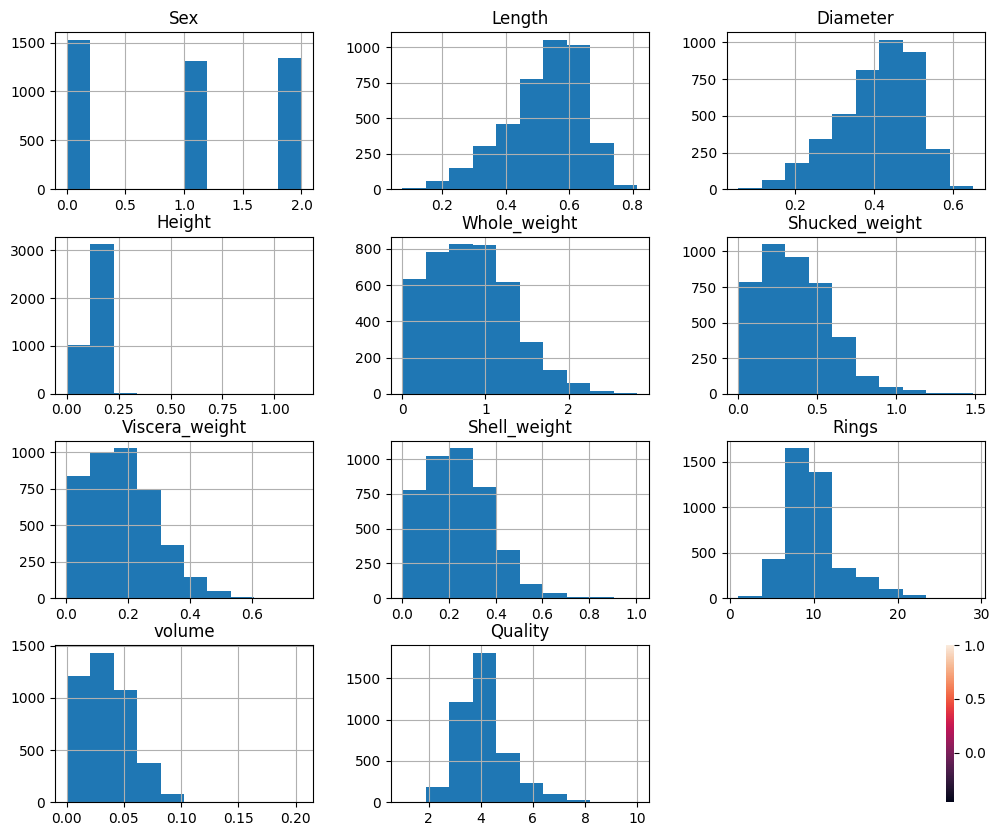

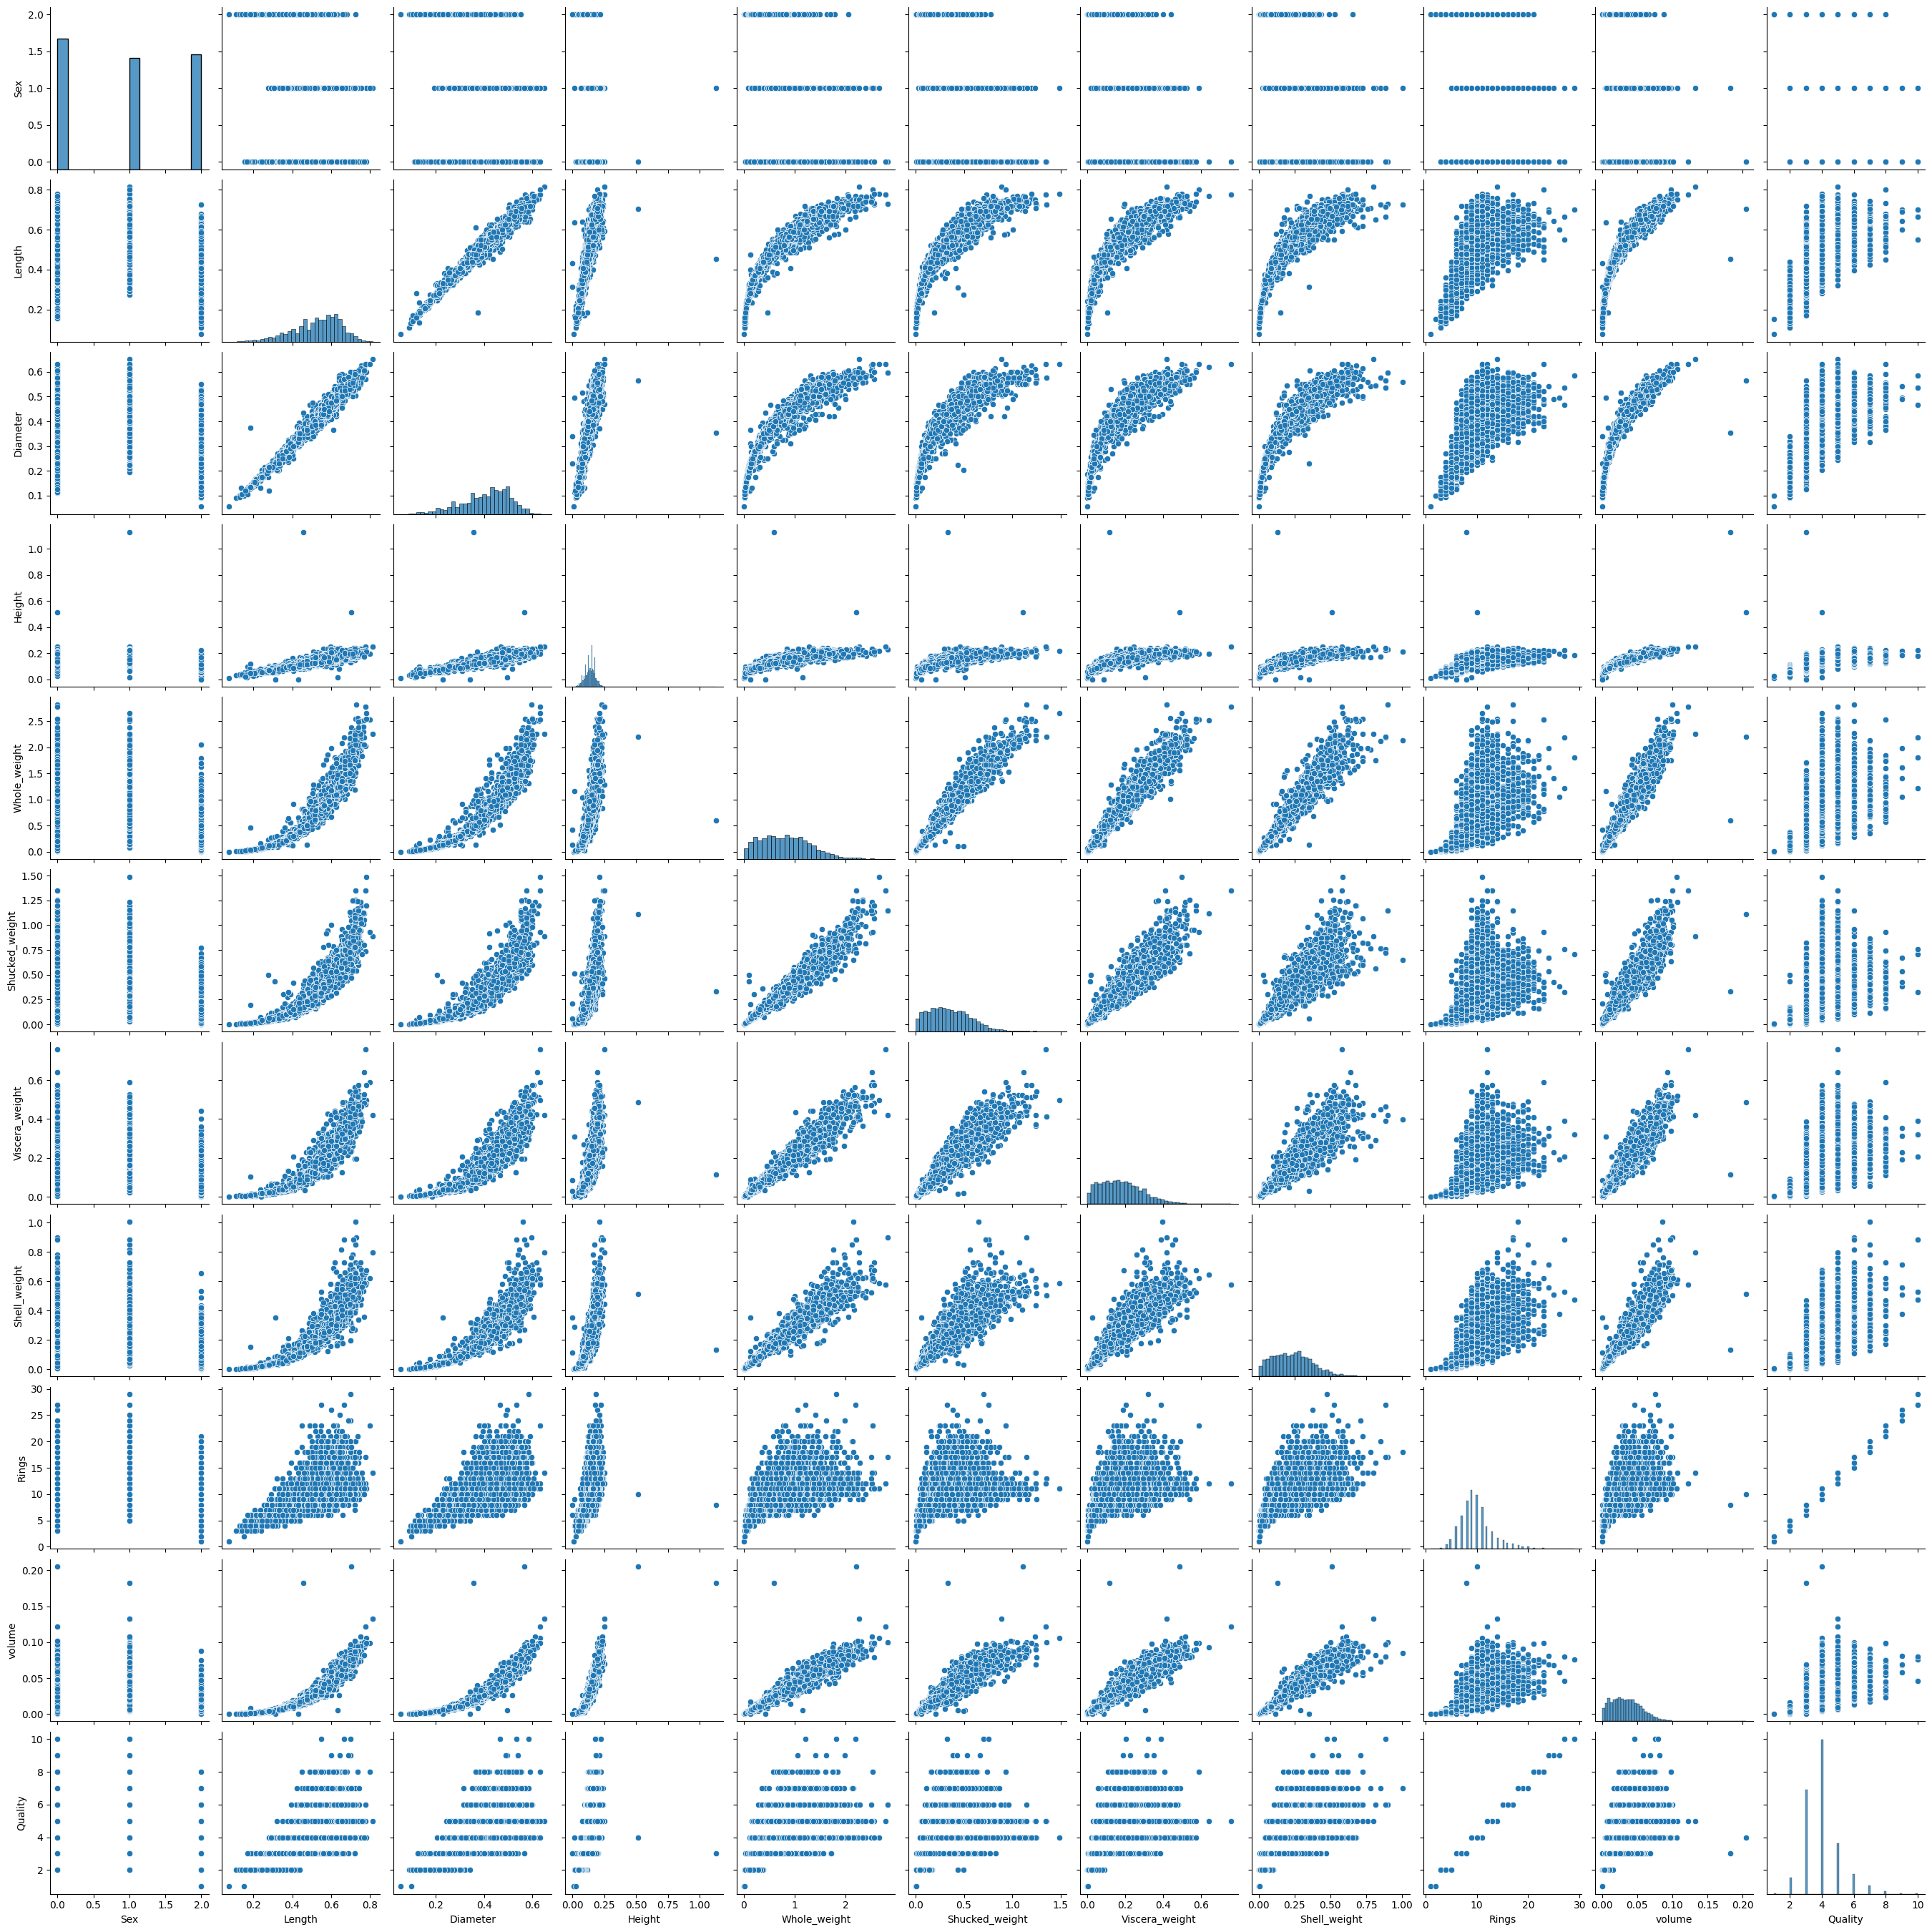

In [26]:
 #Перевіряємо на відсутність пропусків
print(data.isnull().sum())

# Перевіряємо на наявність категоріальних фіч
print(data.info())

# Переглядаємо основні статистичні характеристики
print(data.describe())


# Будуємо графіки розподілу ознак і міток
data.hist(figsize=(12, 10))

# Будуємо графіки коробок для ознак і міток
data.boxplot(figsize=(12, 10))
plt.show()

# Будуємо матрицю розсіювання для ознак і міто

# Будуємо матрицю кореляції для ознак і міток
sns.heatmap(data.corr(), annot=True)
plt.clr()

# Будуємо парний графік для ознак і міток
sns.pairplot(data)
plt.show()

**1. розбиття датасету**

In [10]:
# Ваш код здесь
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_x = train_data.drop(["Rings", "Quality"], axis=1)
train_y = train_data["Quality"]
test_x = test_data.drop(["Rings", "Quality"], axis=1)
test_y = test_data["Quality"]
scaler = StandardScaler()




**2. Нормалізація данних**

In [11]:
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

**3. Створення моделі**

In [23]:

model = KNeighborsClassifier(n_neighbors=10) 


model.fit(train_x, train_y)

predictions = model.predict(test_x)

# Обчислюємо точність моделі
accuracy = accuracy_score(test_y, predictions)
print("Точність:", accuracy)


Точність: 0.5956937799043063


**4. Результати **

In [17]:
print("Прогнози:", predictions[:10])
print("Фактичні:", test_y[:10].values)

Прогнози: [4 4 5 4 5 4 4 3 3 4]
Фактичні: [4 3 6 4 5 4 3 3 3 4]
